In [4]:
import pandas as pd

In [5]:
# dataset from Chapter 3 of An Introduction to Statistical Learning ()
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [4]:
# check the shape of the dataframe (rows, columns)
data.shape

(200, 4)

In [6]:
import seaborn as sns

%matplotlib inline

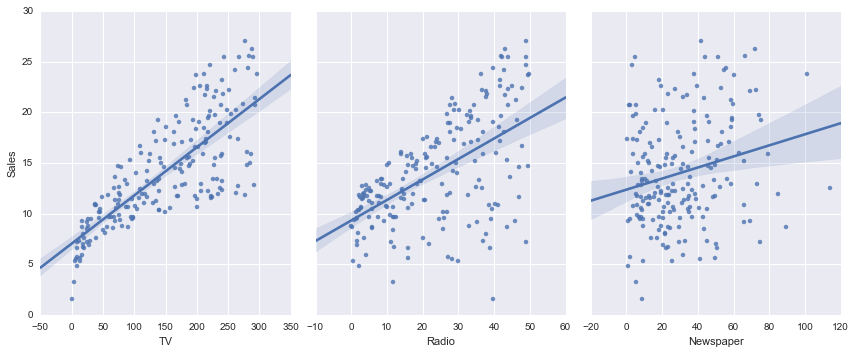

In [12]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars=['Sales'], size=5, aspect=0.8, kind='reg')

In [44]:
# create a list of feature names
feature_cols = ['TV','Radio','Newspaper']

# select a subset of the original dataframe
X = data[feature_cols]

# create a list of response
response_cols = ['Sales']

# select a subset of the original dataframe
y = data[response_cols]

In [22]:
from sklearn.cross_validation import train_test_split

In [23]:
# default split is 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [25]:
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training dataset
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
# print the intercept and coefficients
print linreg.intercept_
print linreg.coef_

# pair the coefficients to the corresponding feature
zip(feature_cols, linreg.coef_)

[ 3.04150071]
[[ 0.04543289  0.18748214 -0.00176087]]


[('TV', array([ 0.04543289,  0.18748214, -0.00176087]))]

# **Model evaluation metrics for regression**

Evalution matrics for classification problems, such as **accuracy**, are not useful for regression.

Let's create some example numeric predictions, and calculate **three common evalution metrics** for regression.

In [46]:
#define numerical examples
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:    

$$\frac{1}{n} \sum_{i=1}^{n} | y_i - \hat{y}_i| $$

In [60]:
# calculate MAE using scikit-learn
from sklearn import metrics
print metrics.median_absolute_error(true, pred)

10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:    

$$\frac{1}{n} \sum_{i=1}^{n} ( y_i - \hat{y}_i)^2 $$

In [61]:
# calculate MSE using scikit-learn
print metrics.mean_squared_error(true, pred)

150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:    

$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} ( y_i - \hat{y}_i)^2}$$

In [68]:
# calculate RMSE using scikit-learn
import numpy as np
print np.sqrt(metrics.mean_squared_error(true, pred))

12.2474487139


 **Comparing these metrics:**

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

 **RMSE for our sales predictions:**

In [73]:
# make predictions on the testing subset
y_pred = linreg.predict(X_test)

# RMSE
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.56799801941


# **Feature Selection**

In [84]:
# select first two features
feature_cols = ['TV', 'Radio']

# select subset
X = data[feature_cols]

#y = data.Sales
y = data[response_cols]

# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model
linreg.fit(X_train, y_train)

# make predictions
y_pred = linreg.predict(X_test)

# compute RMSE
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.38790346994
